In [2]:

import numpy as np
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import dabl

# change look floats
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# pd.reset_option('display.float_format')

In [3]:
df = pd.read_csv('../../data/raw/community_features/Zillow_month.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27317 entries, 0 to 27316
Columns: 276 entries, RegionID to 2022-03-31
dtypes: float64(267), int64(3), object(6)
memory usage: 57.5+ MB


In [4]:
cali = df[df['StateName']=='CA'].copy()
cali.rename(columns={'RegionName':'Zip_Code'},inplace=True)
cali.drop(['RegionType','RegionID','Metro','StateName','State'],axis=1,inplace=True)
cali.to_csv('../../data/processed/housing_cali_raw.csv')
cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 13 to 27312
Columns: 271 entries, SizeRank to 2022-03-31
dtypes: float64(267), int64(2), object(2)
memory usage: 3.3+ MB


In [5]:
months = cali.columns.values[4:-3]
len(cali[months].columns)/12

22.0

In [6]:
data = cali[months]
len(data.columns)

264

## get yearly average of each zipcode to use 

In [7]:
# using - https://stackoverflow.com/questions/59969720/pandas-take-average-over-regular-intervals-of-columns
    
N = 12 
yr_avg = data.groupby(np.arange(len(data.columns)) //N,axis=1).mean().add_prefix('Avg_')
yr_avg.round(1)

yr_avg = yr_avg.round(0)
yr_avg

,Avg_0,Avg_1,Avg_2,Avg_3,Avg_4,Avg_5,Avg_6,Avg_7,Avg_8,Avg_9,...,Avg_12,Avg_13,Avg_14,Avg_15,Avg_16,Avg_17,Avg_18,Avg_19,Avg_20,Avg_21
13,553139.00000,661696.00000,635097.00000,665992.00000,730292.00000,844322.00000,889700.00000,910721.00000,881100.00000,801573.00000,...,773466.00000,896132.00000,1007762.00000,1117213.00000,1158025.00000,1151833.00000,1207842.00000,1212097.00000,1220777.00000,1184057.00000
21,217092.00000,240062.00000,275071.00000,329594.00000,414290.00000,513303.00000,580706.00000,576834.00000,485097.00000,399781.00000,...,370914.00000,428465.00000,468288.00000,497333.00000,539889.00000,586256.00000,639473.00000,659507.00000,702955.00000,801517.00000
39,282928.00000,323907.00000,367980.00000,427138.00000,537685.00000,677982.00000,743194.00000,668612.00000,508177.00000,373145.00000,...,303476.00000,351714.00000,453265.00000,499549.00000,518139.00000,551556.00000,593823.00000,594336.00000,609512.00000,713966.00000
43,483067.00000,538194.00000,606433.00000,721642.00000,881697.00000,1050199.00000,1161956.00000,1182831.00000,1072361.00000,953103.00000,...,884203.00000,1045510.00000,1149254.00000,1210578.00000,1290825.00000,1357964.00000,1454558.00000,1455067.00000,1514176.00000,1639592.00000
87,373719.00000,445282.00000,476884.00000,530731.00000,607557.00000,712894.00000,741084.00000,717693.00000,666367.00000,597109.00000,...,531294.00000,659720.00000,736916.00000,810098.00000,896587.00000,962742.00000,1049344.00000,1049454.00000,1104675.00000,1279235.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,287625.00000,234354.00000,257804.00000,268108.00000,283211.00000,305572.00000,310610.00000,324764.00000
27289,NaN,NaN,NaN,NaN,NaN,228299.00000,252864.00000,230240.00000,183662.00000,156007.00000,...,145595.00000,169192.00000,187126.00000,197323.00000,211436.00000,223162.00000,235278.00000,254521.00000,264038.00000,280804.00000
27290,287452.00000,365994.00000,410356.00000,516958.00000,547963.00000,698871.00000,818694.00000,781168.00000,660080.00000,637156.00000,...,461500.00000,504410.00000,526224.00000,548171.00000,554130.00000,553533.00000,579763.00000,614968.00000,661973.00000,891701.00000
27308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370524.00000


In [8]:
yr_avg.to_csv('../../data/processed/avg_housing_price_by_zip-00-21.csv')

In [110]:
cali = pd.concat([yr_avg['Avg_21'],cali],axis=1)
cali.iloc[:,:]

,Avg_21,SizeRank,Zip_Code,City,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
13,1184057.00000,13,94109,San Francisco,San Francisco County,505724.00000,508437.00000,512673.00000,521329.00000,531340.00000,...,1169002.00000,1186659.00000,1198646.00000,1209774.00000,1216285.00000,1218451.00000,1220499.00000,1218921.00000,1230029.00000,1243797.00000
21,801517.00000,22,90250,Hawthorne,Los Angeles County,208066.00000,208356.00000,209254.00000,211117.00000,213623.00000,...,801938.00000,822215.00000,834074.00000,839174.00000,838377.00000,839489.00000,842610.00000,846070.00000,853240.00000,867265.00000
39,713966.00000,40,94565,Pittsburg,Contra Costa County,272514.00000,273306.00000,273888.00000,275090.00000,277059.00000,...,705928.00000,734211.00000,748843.00000,762141.00000,763295.00000,771004.00000,779030.00000,791446.00000,798828.00000,809441.00000
43,1639592.00000,44,90046,Los Angeles,Los Angeles County,463117.00000,463879.00000,467076.00000,471449.00000,476230.00000,...,1631080.00000,1653887.00000,1672941.00000,1686261.00000,1684730.00000,1680882.00000,1684123.00000,1685433.00000,1694694.00000,1719604.00000
87,1279235.00000,88,94501,Alameda,Alameda County,335259.00000,337169.00000,339974.00000,350554.00000,364470.00000,...,1280110.00000,1325533.00000,1355802.00000,1366180.00000,1354329.00000,1348411.00000,1354794.00000,1374253.00000,1399648.00000,1424869.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,324764.00000,33114,95715,Soda Springs,Placer County,NaN,NaN,NaN,NaN,NaN,...,311789.00000,323697.00000,336963.00000,344213.00000,345645.00000,345863.00000,351978.00000,356976.00000,363682.00000,361191.00000
27289,280804.00000,33451,95981,Strawberry Valley,Plumas County,NaN,NaN,NaN,NaN,NaN,...,278415.00000,282353.00000,285600.00000,290576.00000,294004.00000,297599.00000,302152.00000,305259.00000,308453.00000,309599.00000
27290,891701.00000,33487,95724,Soda Springs,Placer County,267437.00000,266982.00000,269428.00000,272993.00000,276659.00000,...,863184.00000,915474.00000,970401.00000,1007626.00000,1021796.00000,1030757.00000,1040779.00000,1056410.00000,1064143.00000,1065049.00000
27308,370524.00000,34322,95375,Strawberry,Tuolumne County,NaN,NaN,NaN,NaN,NaN,...,360785.00000,378806.00000,392589.00000,402934.00000,403109.00000,397683.00000,395974.00000,396834.00000,407741.00000,416287.00000


In [135]:
df=pd.read_csv('../../data/processed/pov_and_all_school.csv')
df.drop('_merge',inplace=True,axis=1)
df.rename(columns={'Zip Code':'Zip_Code'},inplace=True)

In [136]:
merg= df.merge(cali[['Zip_Code','Avg_21','City','CountyName']],on='Zip_Code',how='left',indicator=True)
merg.drop('Unnamed: 0',inplace=True,axis=1)

In [137]:
merg['_merge'].value_counts()

both          29873
left_only       852
right_only        0
Name: _merge, dtype: int64

In [122]:
merg.columns

Index(['County Code', 'District Code', 'School Code', 'Test Year_x',
       'Student Group ID', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
       'Type ID_x', 'County Name', 'District Name', 

In [ ]:
 'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'Instructional Coordinators [District] 2020-21',
       'Librarians/media specialists [District] 2020-21',
       'LEA Administrators [District] 2020-21',
       'LEA Administrative Support Staff [District] 2020-21',
       'School Administrators [District] 2020-21',
       'Student Support Services Staff (w/o Psychology) [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21', 'cencus_district_ID',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City'

In [126]:
merg[['City','Zip_Code','Avg_21','Estimated Population 5-17',
       'est_num_u17_pov','District Name','School Name','Percentage Standard Exceeded','Mean Scale Score']].sample(10)

,City,Zip_Code,Avg_21,Estimated Population 5-17,est_num_u17_pov,District Name,School Name,Percentage Standard Exceeded,Mean Scale Score
19479,Lodi,95242.00000,515035.00000,35768.00000,6079.00000,lodi unified,Millswood Middle,7.96000,2495.90000
5759,Hanford,93230.00000,300473.00000,422.00000,48.00000,kings river-hardwick union elementary,Kings River-Hardwick Elementary,30.23000,2443.70000
22805,Montecito,93108.00000,3879028.00000,491.00000,51.00000,montecito union elementary,Montecito Union,61.11000,2638.30000
1956,San Ramon,94582.00000,1670400.00000,31096.00000,613.00000,san ramon valley unified,Dougherty Valley High,69.44000,2794.20000
27060,Turlock,95380.00000,382844.00000,14974.00000,2275.00000,turlock unified,Turlock Unified District Level Program,NaN,NaN
10689,Acton,93510.00000,765357.00000,NaN,NaN,mission academy,Mission Academy,26.67000,2568.50000
20624,Los Osos,93402.00000,741452.00000,7995.00000,565.00000,san luis coastal unified,Monarch Grove Elementary,29.09000,2496.90000
21959,Daly City,94014.00000,1086472.00000,7862.00000,598.00000,jefferson elementary,Susan B. Anthony Elementary,12.07000,2432.60000
3534,Fresno,93706.00000,224390.00000,9155.00000,1247.00000,washington unified,Washington High,5.41000,2523.40000
5716,NaN,93232.00000,NaN,6660.00000,1161.00000,hanford elementary,George Washington Elementary,2.27000,2422.40000


In [138]:
## check nulls 
m = pd.DataFrame([merg.isnull().sum(),100*merg.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(15)


,count,%
Mean Scale Score,12829.00000,41.75427
Area 3 Percentage Below Standard,10620.00000,34.56469
Area 1 Percentage Above Standard,10620.00000,34.56469
Area 4 Percentage Below Standard,10620.00000,34.56469
Area 4 Percentage Near Standard,10620.00000,34.56469
Area 4 Percentage Above Standard,10620.00000,34.56469
Area 3 Percentage Near Standard,10620.00000,34.56469
Area 3 Percentage Above Standard,10620.00000,34.56469
Area 2 Percentage Below Standard,10620.00000,34.56469
Area 2 Percentage Near Standard,10620.00000,34.56469


In [129]:
merg.to_csv('../../data/processed/with_21_avg.csv')

In [160]:
county_avg=merg.groupby('CountyName')[ 'Avg_21','Estimated Total Population',
                                      'est_num_u17_pov','Mean Scale Score',
                                      'Percentage Standard Exceeded'].mean()
county_avg.sort_values(by='est_num_u17_pov',ascending=False).head(10)

<ipython-input-160-af1a766b3475>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  county_avg=merg.groupby('CountyName')[ 'Avg_21','Estimated Total Population',


,Avg_21,Estimated Total Population,est_num_u17_pov,Mean Scale Score,Percentage Standard Exceeded
CountyName,,,,,
Los Angeles County,817137.07884,1275730.06840,35637.44118,2491.08202,15.58578
Sacramento County,511049.19005,317119.71309,8533.03064,2490.07084,17.51108
San Francisco County,1604630.72500,866606.00000,7367.00000,2497.11250,16.78470
Riverside County,499551.87386,135285.06652,3682.31545,2484.89456,11.89067
Orange County,1039033.31001,234805.72157,2936.36471,2536.94355,22.91272
San Joaquin County,569272.45246,92866.45104,2836.90594,2475.95138,13.18264
Tulare County,288718.58084,76381.49505,2763.54950,2458.09802,8.89055
San Bernardino County,345665.89402,92048.87063,2621.75000,2475.13980,10.26776
Yuba County,352164.08759,60323.37234,2379.58511,2445.44348,6.50101


In [162]:
county_avg.to_csv('../../data/processed/county_avg.csv')

In [159]:
merg[merg['CountyName']=='Trinity County']

,County Code,District Code,School Code,Test Year_x,Student Group ID,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,Students Enrolled,...,Full-Time Equivalent (FTE) Teachers [District] 2020-21,Pupil/Teacher Ratio [District] 2020-21,cencus_district_ID,Estimated Total Population,Estimated Population 5-17,est_num_u17_pov,Avg_21,City,CountyName,_merge
27769,53,10538,132423,2021,1,4.00000,4.00000,6,English Language Arts/Literacy,NaN,...,1.00000,7.00000,NaN,NaN,NaN,NaN,299134.00000,Weaverville,Trinity County,both
27770,53,10538,132423,2021,1,4.00000,4.00000,7,English Language Arts/Literacy,NaN,...,1.00000,7.00000,NaN,NaN,NaN,NaN,299134.00000,Weaverville,Trinity County,both
27771,53,10538,132423,2021,1,4.00000,4.00000,8,English Language Arts/Literacy,NaN,...,1.00000,7.00000,NaN,NaN,NaN,NaN,299134.00000,Weaverville,Trinity County,both
27772,53,10538,132423,2021,1,4.00000,4.00000,11,English Language Arts/Literacy,NaN,...,1.00000,7.00000,NaN,NaN,NaN,NaN,299134.00000,Weaverville,Trinity County,both
27773,53,10538,132423,2021,1,4.00000,4.00000,13,English Language Arts/Literacy,6.00000,...,1.00000,7.00000,NaN,NaN,NaN,NaN,299134.00000,Weaverville,Trinity County,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27924,53,76513,6053821,2021,1,187.00000,187.00000,5,Mathematics,32.00000,...,34.07000,20.40000,1331.00000,8184.00000,805.00000,147.00000,299134.00000,Weaverville,Trinity County,both
27925,53,76513,6053821,2021,1,187.00000,187.00000,6,Mathematics,32.00000,...,34.07000,20.40000,1331.00000,8184.00000,805.00000,147.00000,299134.00000,Weaverville,Trinity County,both
27926,53,76513,6053821,2021,1,187.00000,187.00000,7,Mathematics,30.00000,...,34.07000,20.40000,1331.00000,8184.00000,805.00000,147.00000,299134.00000,Weaverville,Trinity County,both
27927,53,76513,6053821,2021,1,187.00000,187.00000,8,Mathematics,41.00000,...,34.07000,20.40000,1331.00000,8184.00000,805.00000,147.00000,299134.00000,Weaverville,Trinity County,both


In [168]:
merg[merg['City']=='Weaverville'][['School Name','Grade','Students Enrolled','Avg_21',
                'Estimated Total Population','est_num_u17_pov','Mean Scale Score',
                         'Percentage Standard Exceeded','Pupil/Teacher Ratio [District] 2020-21',
                                   ]]

,School Name,Grade,Students Enrolled,Avg_21,Estimated Total Population,est_num_u17_pov,Mean Scale Score,Percentage Standard Exceeded,Pupil/Teacher Ratio [District] 2020-21
27769,R.I.S.E. Academy,6,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27770,R.I.S.E. Academy,7,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27771,R.I.S.E. Academy,8,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27772,R.I.S.E. Academy,11,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27773,R.I.S.E. Academy,13,6.00000,299134.00000,NaN,NaN,NaN,NaN,7.00000
27774,R.I.S.E. Academy,6,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27775,R.I.S.E. Academy,7,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27776,R.I.S.E. Academy,8,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27777,R.I.S.E. Academy,11,NaN,299134.00000,NaN,NaN,NaN,NaN,7.00000
27778,R.I.S.E. Academy,13,6.00000,299134.00000,NaN,NaN,NaN,NaN,7.00000


In [172]:
merg.City.nunique()

660

In [173]:
## could fill nulls by county

merg['CountyName'].nunique()

58

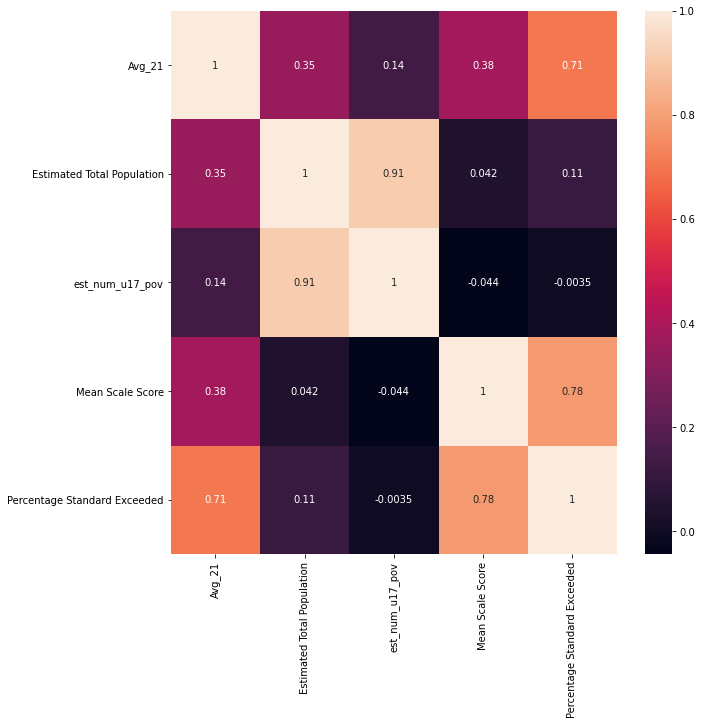

In [147]:
fig,ax = plt.subplots(figsize=(10,10))
fig=sns.heatmap(county_avg.corr(),annot=True)

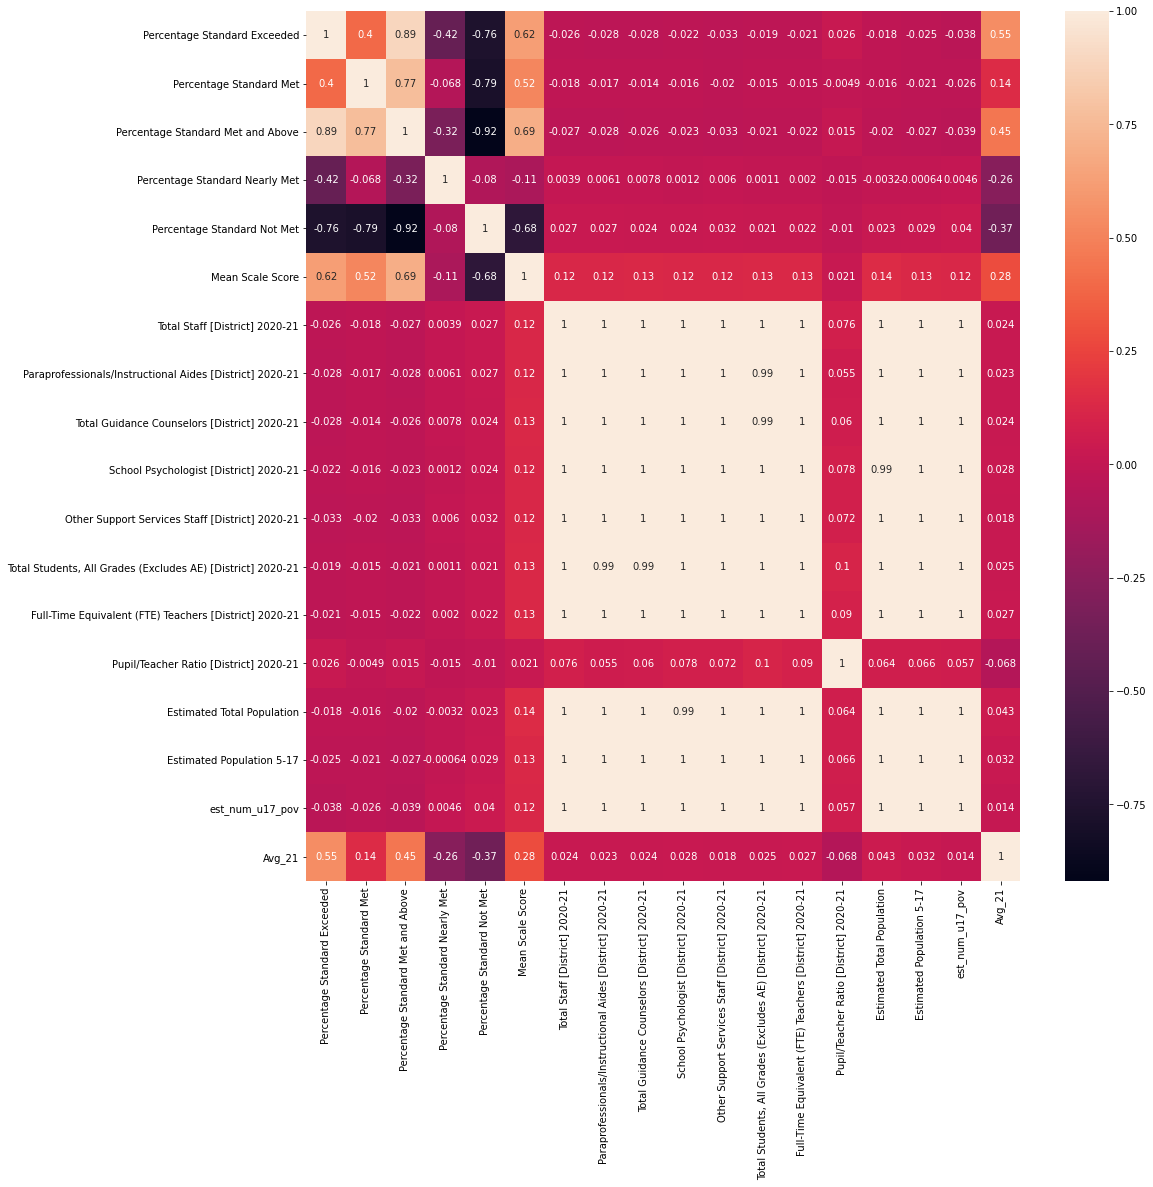

In [153]:
fig,ax = plt.subplots(figsize=(16,16))
fig=sns.heatmap(merg[[ 'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','Mean Scale Score',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
        'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City','CountyName'  ]].corr(),annot=True)

### correlation between average housing price and scores clear between standards exceeded being positive and negative between percentage standards not met

### evidence to look for more correlations in community

In [155]:
merg.Grade.value_counts()

13    8040
5     3694
4     3657
3     3602
11    3379
6     3074
8     2662
7     2617
Name: Grade, dtype: int64

Target looks like regression


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 4 outliers in column Avg_21.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column Percentage Standard Nearly Met.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:130: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",


[array([[<AxesSubplot:title={'center':'F=1.89E+04'}, xlabel='Percentage Standa...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=1.42E+04'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=1.10E+04'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=2.59E+03'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=3.81E+02'}, xlabel='Avg_21'>],
        [<AxesSubplot:title={'center':'F=9.33E+01'}, xlabel='Pupil/Teacher Rat...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=2.96E+01'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=2.24E+01'}, xlabel='est_num_u17_pov'>,
         <AxesSubplot:title={'center':'F=1.88E+01'}, xlabel='Estimated Populat...'>,
         <AxesSubplot:title={'center':'F=1.55E+01'}, xlabel='Estimated Total P...'>],
        [<AxesSubplot:title={'center':'F=1.48E+01'}, xlabel='Other Support Ser...', ylabel='Mean Scale Score'>,
 

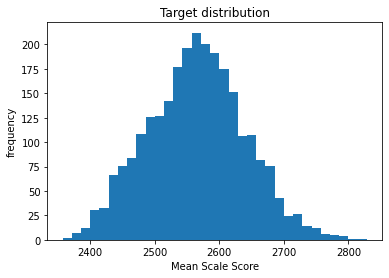

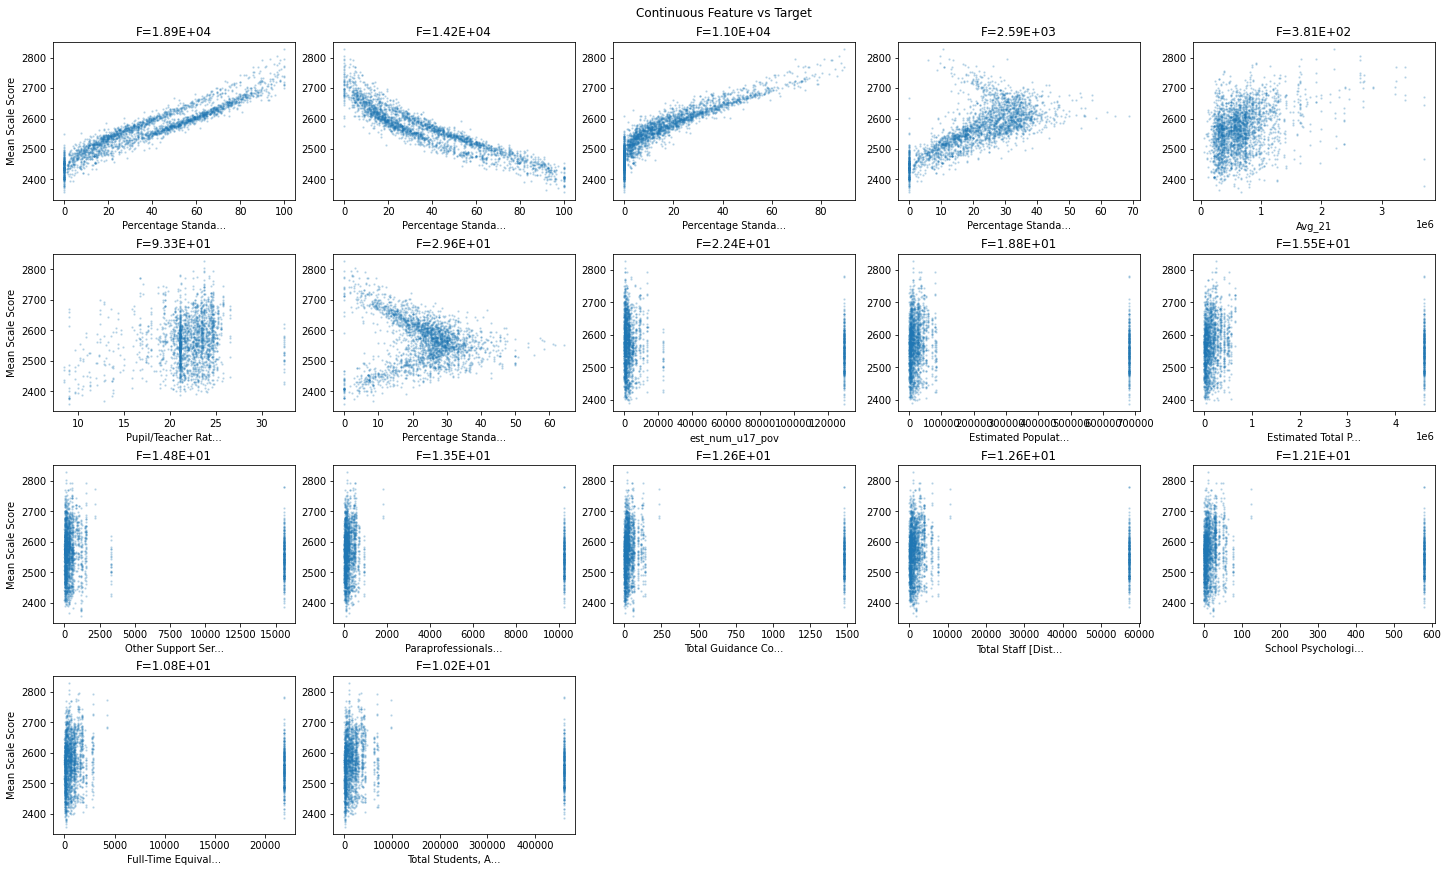

In [157]:
dabl.plot(merg[merg['Grade']==11][['Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','Mean Scale Score',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
        'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City','CountyName' ]], target_col='Mean Scale Score')

Target looks like regression


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 2 outliers in column Pupil/Teacher Ratio [District] 2020-21.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column est_num_u17_pov.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column Total Students, All Grades (Excludes AE) [District] 2020-21.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1

[array([[<AxesSubplot:title={'center':'F=2.20E+04'}, xlabel='Percentage Standa...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=1.97E+04'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=7.96E+03'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=1.93E+03'}, xlabel='Percentage Standa...'>,
         <AxesSubplot:title={'center':'F=6.03E+02'}, xlabel='Avg_21'>],
        [<AxesSubplot:title={'center':'F=2.64E+01'}, xlabel='Percentage Standa...', ylabel='Mean Scale Score'>,
         <AxesSubplot:title={'center':'F=8.46E+00'}, xlabel='Pupil/Teacher Rat...'>,
         <AxesSubplot:title={'center':'F=3.05E+00'}, xlabel='est_num_u17_pov'>,
         <AxesSubplot:title={'center':'F=2.38E+00'}, xlabel='Total Students, A...'>,
         <AxesSubplot:title={'center':'F=2.37E+00'}, xlabel='School Psychologi...'>],
        [<AxesSubplot:title={'center':'F=2.13E+00'}, xlabel='Full-Time Equival...', ylabel='Mean Scale Score'>,
 

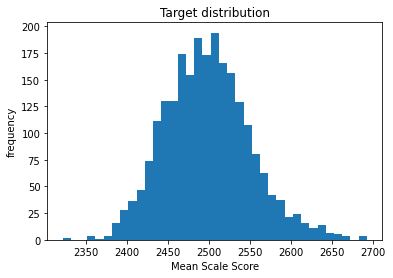

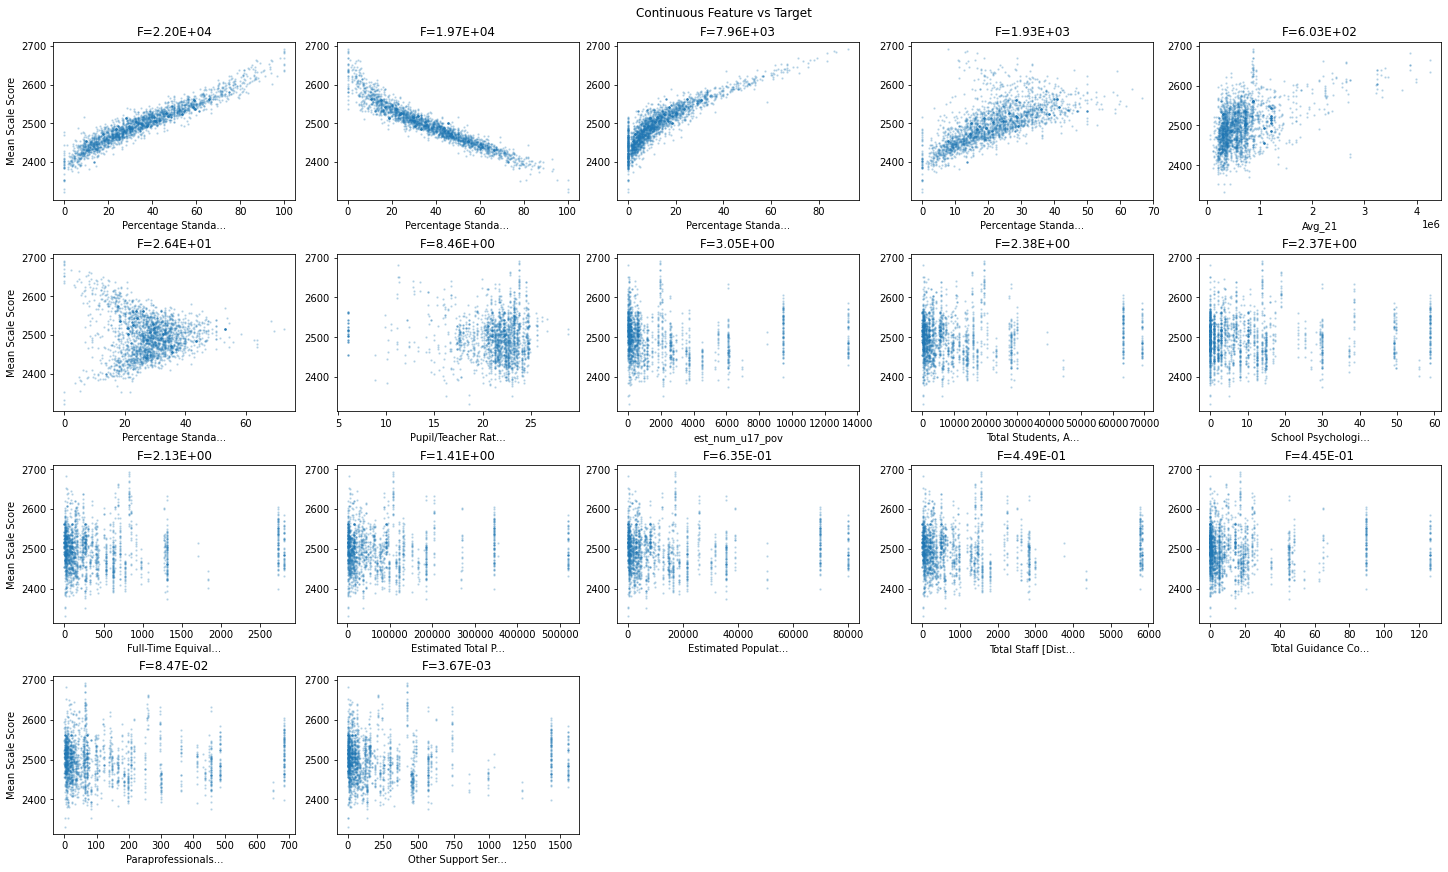

In [158]:
dabl.plot(merg[merg['Grade']==6][['Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met','Mean Scale Score',
'Total Staff [District] 2020-21',
       'Paraprofessionals/Instructional Aides [District] 2020-21',
       'Total Guidance Counselors [District] 2020-21',
       'School Psychologist [District] 2020-21',
       'Other Support Services Staff [District] 2020-21', 
        'Total Students, All Grades (Excludes AE) [District] 2020-21',
       'Full-Time Equivalent (FTE) Teachers [District] 2020-21',
       'Pupil/Teacher Ratio [District] 2020-21',
       'Estimated Total Population', 'Estimated Population 5-17',
       'est_num_u17_pov', 'Avg_21', 'City','CountyName' ]], target_col='Mean Scale Score')